In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

import plotly.offline as py
py.init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

### Dataset Describe

In [60]:
import pandas as pd

# Load the dataset to understand its structure and content
file_path = 'churn.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()



customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [61]:
data.describe().transpose()

count          mean           std          min  \
customer_id       10000.0  1.569094e+07  71936.186123  15565701.00   
credit_score      10000.0  6.505288e+02     96.653299       350.00   
age               10000.0  3.892180e+01     10.487806        18.00   
tenure            10000.0  5.012800e+00      2.892174         0.00   
balance           10000.0  7.648589e+04  62397.405202         0.00   
products_number   10000.0  1.530200e+00      0.581654         1.00   
credit_card       10000.0  7.055000e-01      0.455840         0.00   
active_member     10000.0  5.151000e-01      0.499797         0.00   
estimated_salary  10000.0  1.000902e+05  57510.492818        11.58   
churn             10000.0  2.037000e-01      0.402769         0.00   

                          25%           50%           75%          max  
customer_id       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
credit_score           584.00  6.520000e+02  7.180000e+02       850.00  
age                     32.00  3.700000e+01  4.400000e+01        92.00  
tenure                   3.00  5.000000e+00  7.000000e+00        10.00  
balance                  0.00  9.719854e+04  1.276442e+05    250898.09  
products_number          1.00  1.000000e+00  2.000000e+00         4.00  
credit_card              0.00  1.000000e+00  1.000000e+00         1.00  
active_member            0.00  1.000000e+00  1.000000e+00         1.00  
estimated_salary     51002.11  1.001939e+05  1.493882e+05    199992.48  
churn                    0.00  0.000000e+00  0.000000e+00         1.00

### handling missing values

In [62]:
# Descriptive statistical analysis
descriptive_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

descriptive_stats, missing_values


(        customer_id  credit_score           age        tenure        balance  \
 count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
 mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
 std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
 min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
 25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
 50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
 75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
 max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   
 
        products_number  credit_card  active_member  estimated_salary  \
 count     10000.000000  10000.00000   10000.000000      10000.000000   
 mean          1.530200      0.70550       0.515100     100090.239881   
 std           0.581654      0.45584       0.49979

### EDA

In [63]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

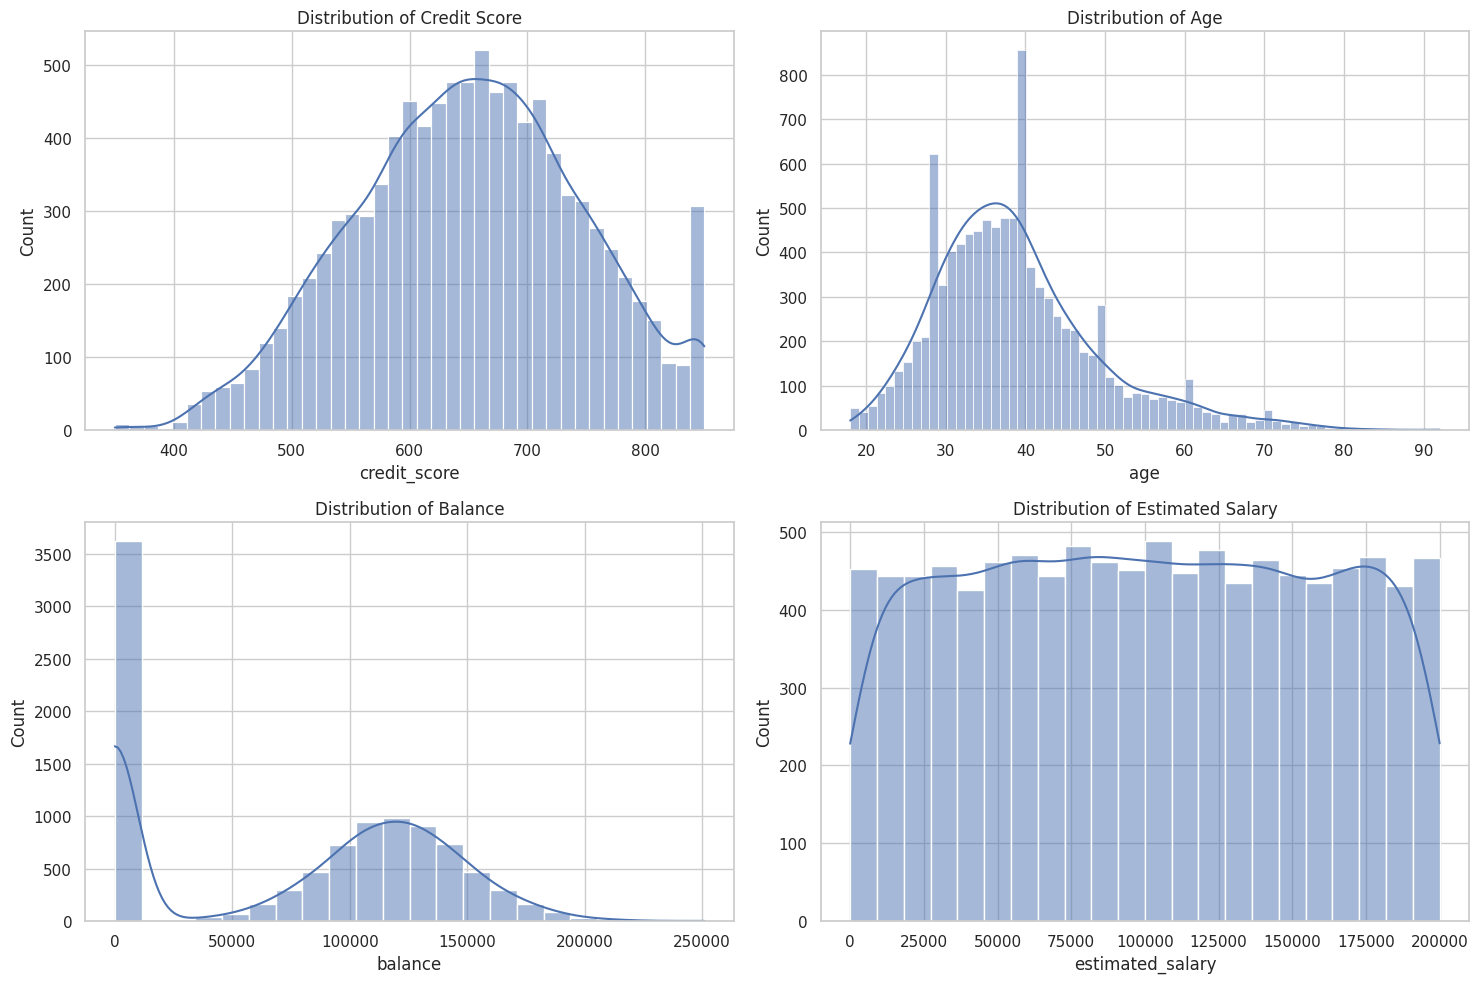

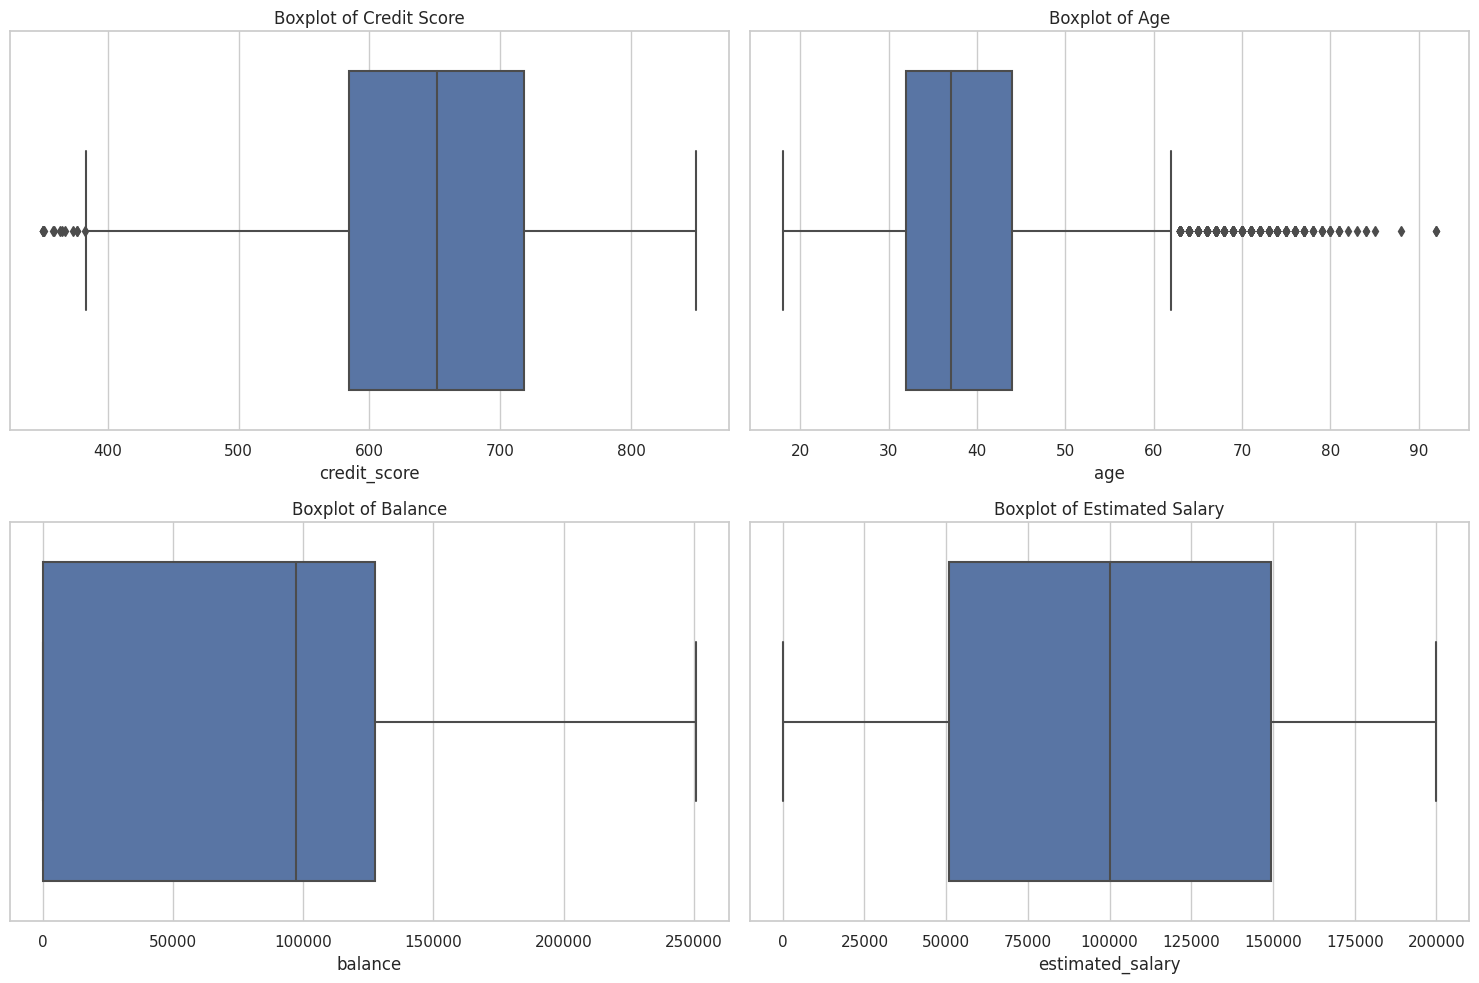

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plotting distributions of key variables
sns.histplot(data['credit_score'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Credit Score')

sns.histplot(data['age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')

sns.histplot(data['balance'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Balance')

sns.histplot(data['estimated_salary'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Estimated Salary')

plt.tight_layout()
plt.show()

# Creating boxplots to identify outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.boxplot(x='credit_score', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Credit Score')

sns.boxplot(x='age', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Age')

sns.boxplot(x='balance', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Balance')

sns.boxplot(x='estimated_salary', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Estimated Salary')

plt.tight_layout()
plt.show()


In [65]:
fig = px.histogram(data, x="age", y="balance", color="churn", marginal="box",hover_data=data.columns)
fig.show()

In [66]:
def plot_correlation_heatmap(data):
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()


In [67]:
def plot_categorical_churn(data):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    sns.countplot(x='country', hue='churn', data=data, ax=axes[0, 0])
    axes[0, 0].set_title('Churn by Country')

    sns.countplot(x='gender', hue='churn', data=data, ax=axes[0, 1])
    axes[0, 1].set_title('Churn by Gender')

    sns.countplot(x='products_number', hue='churn', data=data, ax=axes[1, 0])
    axes[1, 0].set_title('Churn by Number of Products')

    sns.countplot(x='credit_card', hue='churn', data=data, ax=axes[1, 1])
    axes[1, 1].set_title('Churn by Credit Card Possession')

    plt.tight_layout()
    plt.show()


In [68]:
def plot_numerical_scatter(data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    sns.scatterplot(x='age', y='balance', hue='churn', data=data, ax=axes[0])
    axes[0].set_title('Age vs. Balance')

    sns.scatterplot(x='credit_score', y='estimated_salary', hue='churn', data=data, ax=axes[1])
    axes[1].set_title('Credit Score vs. Estimated Salary')

    plt.tight_layout()
    plt.show()


In [69]:
def plot_churn_distribution(data):
    churn_counts = [data[data['churn'] == 1].shape[0], data[data['churn'] == 0].shape[0]]
    churn_labels = ['Churned Customers', 'Retained Customers']
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.pie(churn_counts, labels=churn_labels, shadow=True, autopct='%1.2f%%')
    plt.legend()
    plt.title("Comparison of Churned and Retained Customers", size=15)
    plt.show()


In [70]:
def display_grouped_statistics(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    feature_columns = numeric_columns.drop('churn') if 'churn' in numeric_columns else numeric_columns
    grouped_mean = data.groupby('churn')[feature_columns].mean().style.background_gradient(cmap="cool")
    grouped_median = data.groupby('churn')[feature_columns].median().style.background_gradient(cmap="cool")
    return grouped_mean, grouped_median


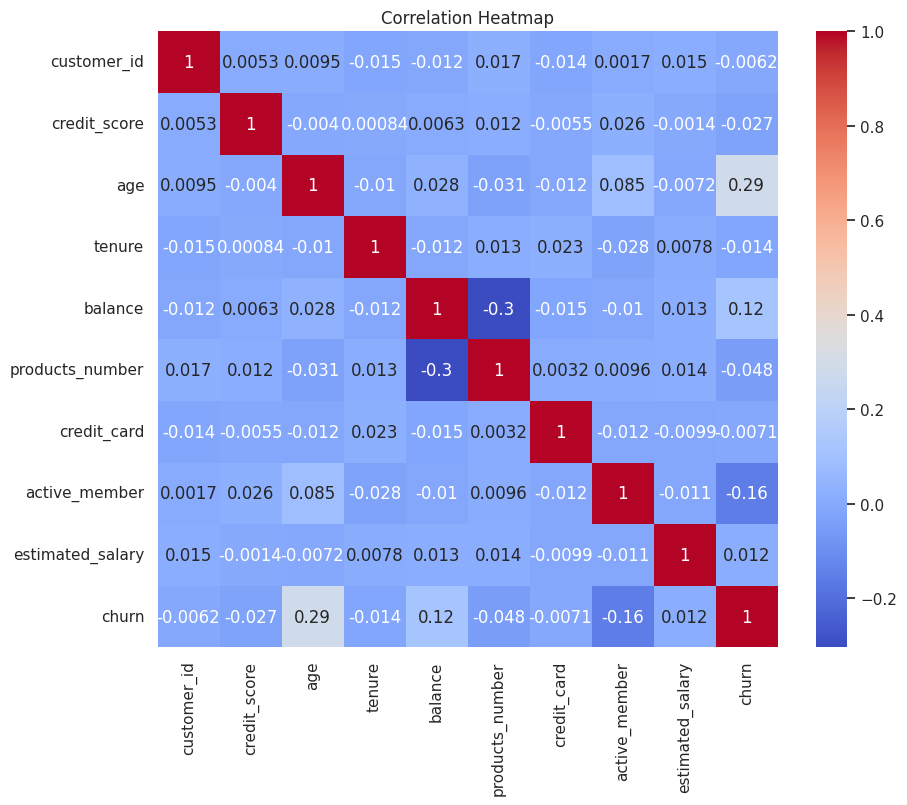

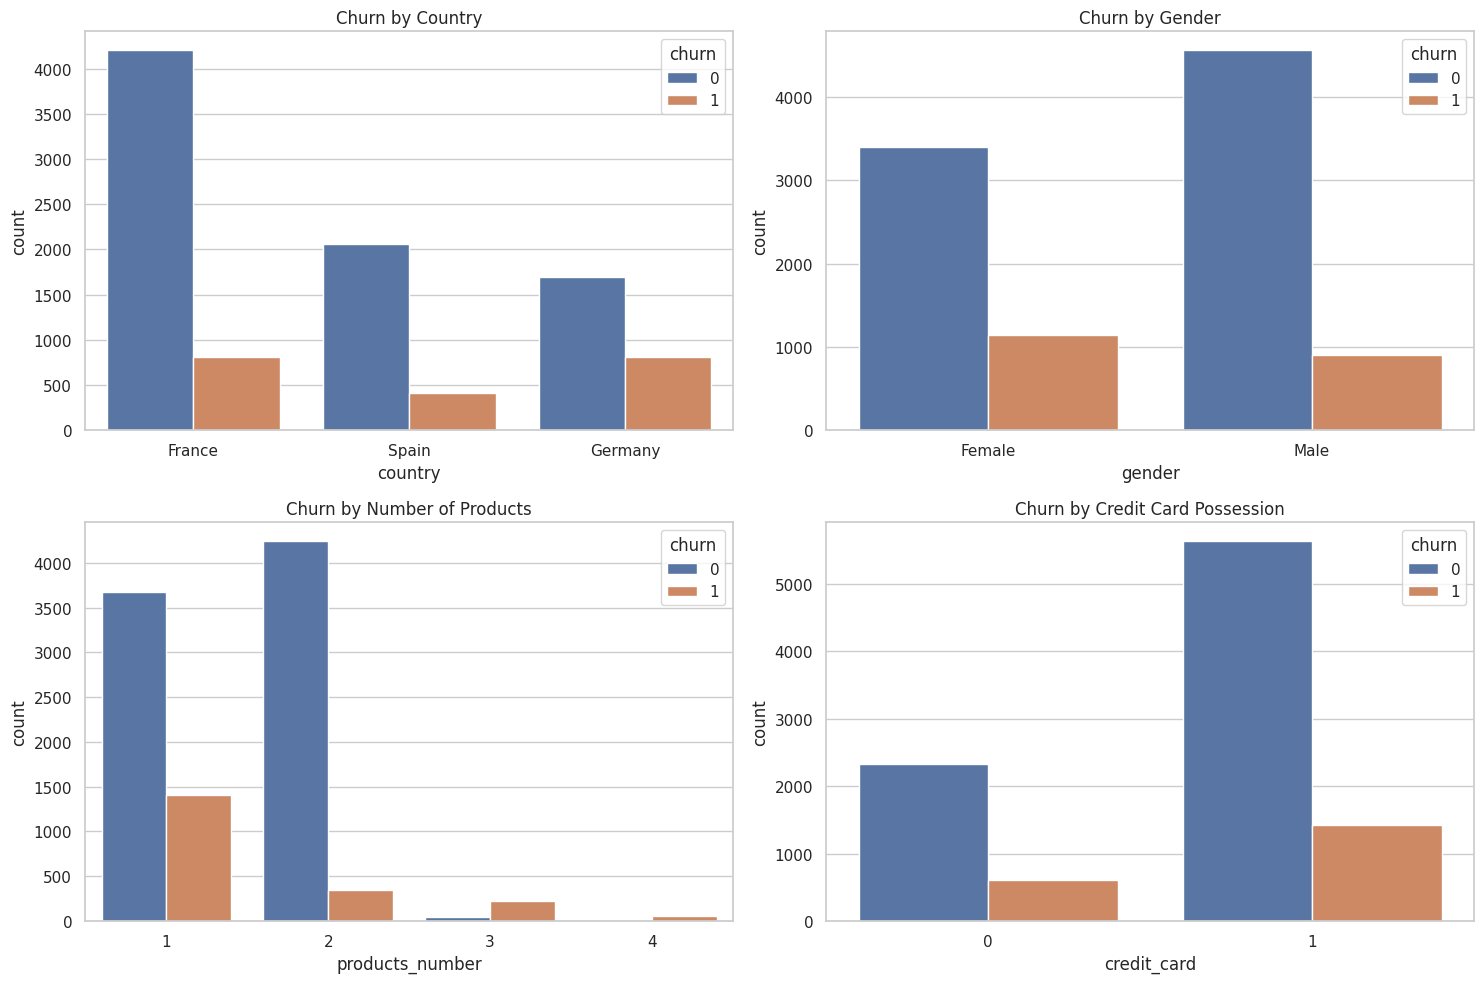

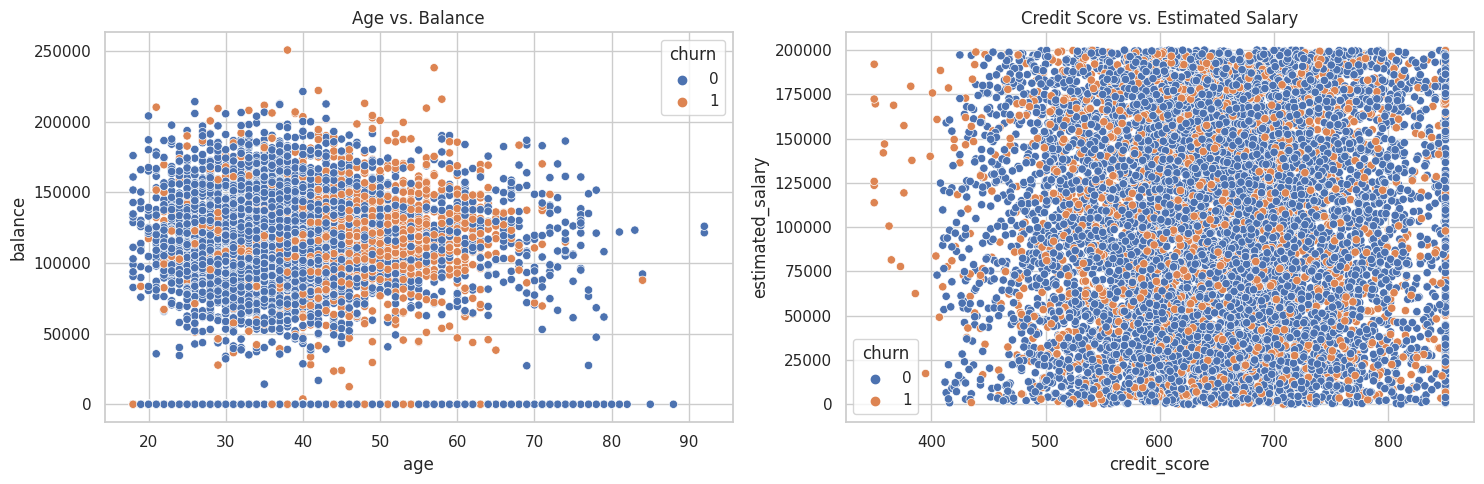

In [71]:
plot_correlation_heatmap(data)
plot_categorical_churn(data)
plot_numerical_scatter(data)



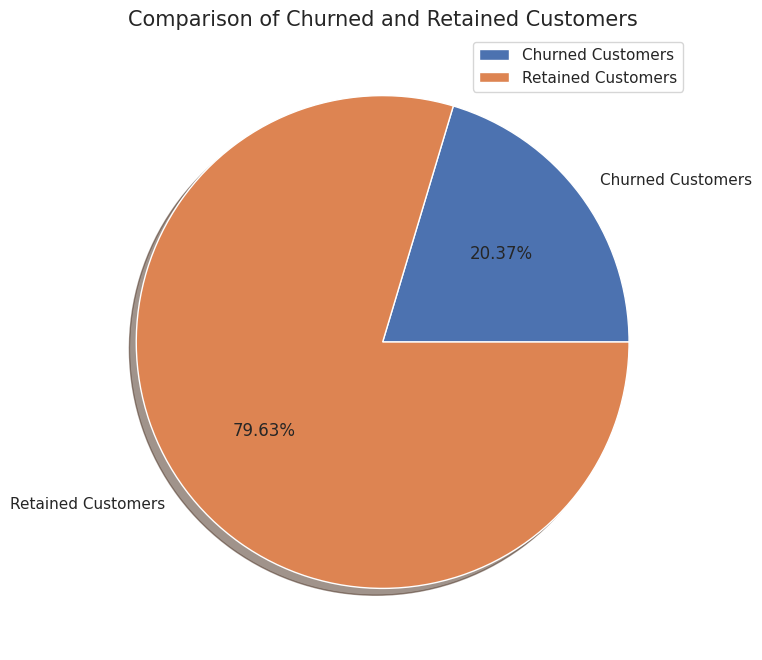

In [72]:
plot_churn_distribution(data)
mean_display, median_display = display_grouped_statistics(data)
mean_display


In [73]:
median_display

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Defining the features and target variable
features = data.drop(['churn', 'customer_id'], axis=1)  # Dropping 'customer_id' as it's not useful for prediction
target = data['churn']

# Identifying categorical and numeric columns
categorical_cols = features.select_dtypes(include=['object', 'category']).columns
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputing missing values if any
    ('scaler', StandardScaler())])  # Scaling numeric features

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputing missing values if any
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encoding for categorical variables

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Applying the transformations to the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 13), (2000, 13), (8000,), (2000,))

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Training the model
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

# Calculating accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)


0.811


In [81]:
conf_matrix

array([[1543,   64],
       [ 314,   79]])

In [82]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



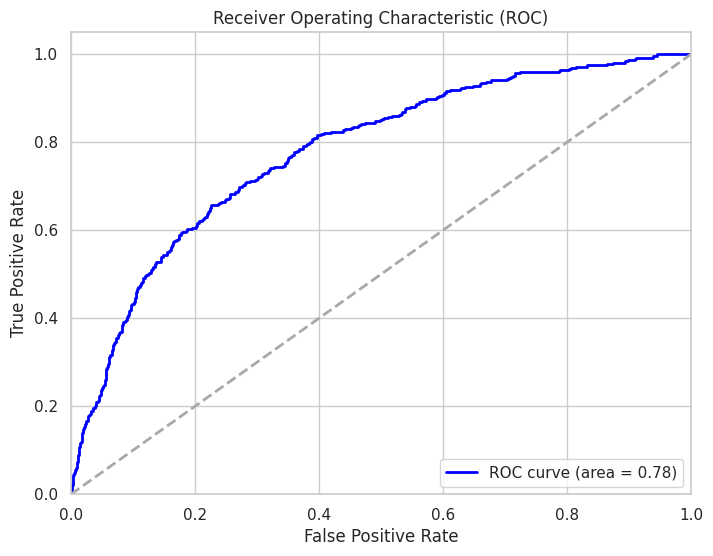

0.7788792987423027

In [83]:
from sklearn.metrics import roc_curve, auc

# Calculating the probabilities of the predictions
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

roc_auc


### Quantitative Analysis

In [84]:
import statsmodels.api as sm

# Reconstructing the logistic model using statsmodels for detailed statistics
# Adding a constant to the features for the intercept
X_train_sm = sm.add_constant(X_train)

# Building the logistic model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Displaying the summary of the logistic regression model
model_summary = result.summary2()
model_summary


Optimization terminated successfully.
         Current function value: 0.431349
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Method:            MLE        
Dependent Variable:  churn             Pseudo R-squared:  0.151      
Date:                2023-11-18 19:57  AIC:               6925.5774  
No. Observations:    8000              BIC:               7009.4237  
Df Model:            11                Log-Likelihood:    -3450.8    
Df Residuals:        7988              LL-Null:           -4063.5    
Converged:           1.0000            LLR p-value:       5.5571e-256
No. Iterations:      7.0000            Scale:             1.0000     
---------------------------------------------------------------------
       Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
---------------------------------------------------------------------
const -0.8403 2089977.5504  -0.0000 1.0000 -4096281.5677 4096279.8870
x1    -0.0678       0.0302  -2.2454 0.0247       -0.1269      -0.0086
x2     0.7551       0.0300  25.1575 0.0000        0.6963       0.8139
x3    -0.0427       0.0301  -1.4198 0.1557       -0.1018       0.0163
x4     0.1609       0.0357   4.5059 0.0000        0.0909       0.2308
x5    -0.0606       0.0305  -1.9914 0.0464       -0.1203      -0.0010
x6    -0.0103       0.0301  -0.3410 0.7331       -0.0694       0.0488
x7    -0.5341       0.0321 -16.6386 0.0000       -0.5970      -0.4712
x8     0.0158       0.0304   0.5188 0.6039       -0.0438       0.0753
x9    -0.5703          nan      nan    nan           nan          nan
x10    0.2089          nan      nan    nan           nan          nan
x11   -0.4790          nan      nan    nan           nan          nan
x12   -0.1540          nan      nan    nan           nan          nan
x13   -0.6863          nan      nan    nan           nan          nan
=====================================================================

"""

In [85]:
# Calculating Odds Ratios and their 97.5% Confidence Intervals
odds_ratios = pd.DataFrame()
odds_ratios['Coefficient'] = result.params
odds_ratios['Odds Ratio'] = np.exp(result.params)
odds_ratios['P-value'] = result.pvalues
odds_ratios['[0.025 CI]'] = np.exp(result.conf_int().iloc[:, 0])
odds_ratios['[0.975 CI]'] = np.exp(result.conf_int().iloc[:, 1])

odds_ratios


Coefficient  Odds Ratio        P-value  [0.025 CI]  [0.975 CI]
const    -0.840334    0.431567   9.999997e-01    0.000000         inf
x1       -0.067752    0.934492   2.474344e-02    0.880828    0.991425
x2        0.755082    2.127787  1.169174e-139    2.006227    2.256712
x3       -0.042744    0.958156   1.556627e-01    0.903255    1.016395
x4        0.160864    1.174525   6.610373e-06    1.095150    1.259653
x5       -0.060641    0.941161   4.644080e-02    0.886632    0.999044
x6       -0.010278    0.989775   7.331169e-01    0.932997    1.050008
x7       -0.534071    0.586213   3.660599e-62    0.550470    0.624278
x8        0.015752    1.015877   6.039001e-01    0.957187    1.078165
x9       -0.570285    0.565364            NaN         NaN         NaN
x10       0.208904    1.232326            NaN         NaN         NaN
x11      -0.478952    0.619432            NaN         NaN         NaN
x12      -0.154038    0.857239            NaN         NaN         NaN
x13      -0.686294    0.503438            NaN         NaN         NaN

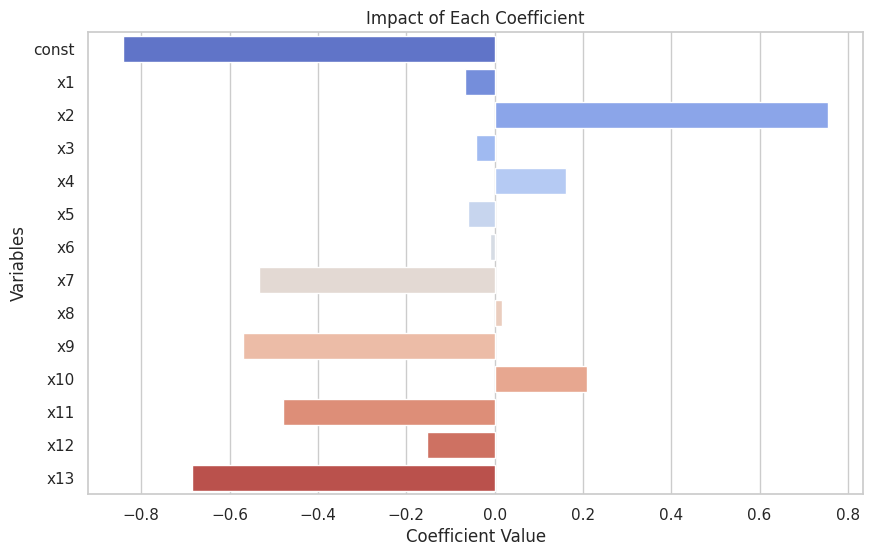

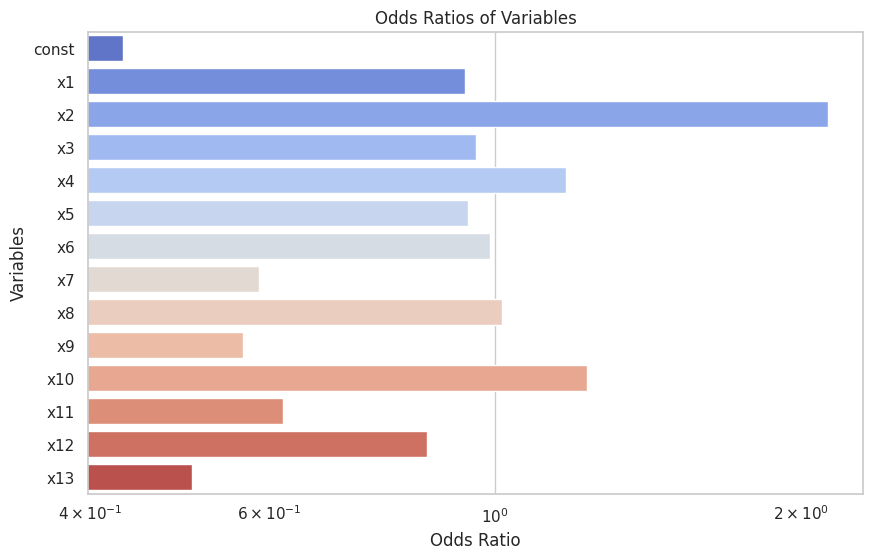

In [86]:
# Coefficient Impact Plot
coef_impact = odds_ratios.reset_index()
coef_impact.columns = ['Variable', 'Coefficient', 'Odds Ratio', 'P-value', '0.025 CI', '0.975 CI']

# Plotting Coefficient Impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_impact, palette='coolwarm')
plt.title('Impact of Each Coefficient')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.show()

# Odds Ratio Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Variable', data=coef_impact, palette='coolwarm')
plt.title('Odds Ratios of Variables')
plt.xlabel('Odds Ratio')
plt.ylabel('Variables')
plt.xscale('log')  # Log scale due to wide range of odds ratios
plt.show()
